# Data analysis with ALFALFA & SDSS

## Import

In [295]:
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom, rotate
from PIL import Image, ImageFilter
import cv2

In [304]:
plt.style.use(astropy_mpl_style)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
nsa_dat = Table.read("./data/nsa_v1_0_1.fits", format="fits")

In [4]:
nsa_df = nsa_dat[["IAUNAME", "PID", "AID", "RA", "DEC", "ZDIST", "MAG", "SERSIC_N", "SERSIC_BA", "SERSIC_TH50", "SERSIC_PHI", "IALFALFA"]].to_pandas()
nsa_df["IAUNAME"] = nsa_df["IAUNAME"].str.decode("utf-8")

In [5]:
nsa_df

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
0,J094651.40-010228.5,36,0,146.714215,-1.041280,0.020688,15.178774,4.776152,0.665165,5.882104,15.978210,-1
1,J094630.85-004554.5,29,0,146.628585,-0.765162,0.064036,17.318521,2.222374,0.278542,3.291051,86.211060,-1
2,J094631.59-005917.7,33,0,146.631706,-0.988347,0.052031,18.123354,0.883118,0.454037,2.817786,163.904358,-1
3,J094744.18-004013.4,10,0,146.934129,-0.670405,0.120650,17.660961,6.000000,0.927469,2.365968,151.608215,-1
4,J094751.74-003242.0,30,0,146.963500,-0.544776,0.055362,17.616278,0.500000,0.463153,5.957229,135.733917,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
641404,J235101.08-100042.7,30,0,357.755712,-10.010851,0.074767,17.445000,1.730513,0.435391,10.630543,58.612122,-1
641405,J235247.10-105259.6,25,0,358.197549,-10.883763,0.076552,16.902000,1.467699,0.618548,11.401611,167.957855,-1
641406,J235320.91-103238.7,40,0,358.336971,-10.544118,0.077557,19.254999,0.733040,0.290098,3.973276,59.589600,-1
641407,J235406.94-102419.7,75,0,358.530488,-10.405839,0.075259,18.534000,1.685543,0.780133,159.757812,119.685852,-1


In [6]:
alf_df = pd.read_csv("data/a100.code12.table2.190808.csv")

In [7]:
alf_df

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
0,105367,........,0.00167,5.44333,0.00333,5.44250,11983,274,39,281,1.14,0.08,8.1,1.91,166.0,2.3,9.87,0.05,1
1,333313,........,0.00375,24.90889,359.99750,24.90750,11181,313,20,333,1.80,0.09,11.3,2.02,154.8,2.3,10.01,0.05,1
2,331060,478-009b,0.01042,23.08472,0.01417,23.08750,4463,160,4,184,1.96,0.07,14.7,2.35,50.6,10.4,9.07,0.18,1
3,331061,456-013.,0.01042,15.87222,0.00875,15.88167,6007,260,45,268,1.13,0.09,6.5,2.40,85.2,2.4,9.29,0.06,1
4,104570,........,0.00667,32.70834,0.00500,32.71028,10614,245,6,250,0.86,0.07,6.6,1.86,147.0,2.3,9.64,0.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31497,331054,517-008.,359.92041,34.34722,359.92877,34.34528,4900,84,14,152,2.24,0.07,23.3,2.33,69.5,2.3,9.41,0.05,1
31498,331052,Eder.Dw.,359.93500,27.25778,359.93750,27.25389,4692,61,2,75,0.58,0.04,7.6,1.95,66.5,2.3,8.78,0.06,1
31499,334869,........,359.96167,21.55028,359.96042,21.55611,10432,171,9,185,0.97,0.07,7.7,2.14,144.0,2.3,9.68,0.06,1
31500,332965,........,359.98166,5.23889,359.97873,5.23889,3038,124,9,158,1.18,0.06,13.4,1.76,42.8,2.3,8.71,0.07,1


## Filtering

### 1. ALFALFA

#### 1) Filtering by Quality (`HIcode > 1`)

In [8]:
alf_filter1 = alf_df[alf_df["HIcode"] > 1]
alf_filter1

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
23,101866,........,0.20875,14.27000,0.19958,14.27750,10877,291,149,312,0.79,0.11,4.1,2.52,150.3,2.4,9.62,0.08,2
27,331943,........,0.22667,18.50250,0.22667,18.50611,16678,157,7,168,0.81,0.08,5.9,2.45,233.2,2.3,10.02,0.06,2
47,331079,I1526...,0.37917,11.34472,0.38083,11.34583,9121,262,7,267,1.03,0.09,6.1,2.33,125.2,2.2,9.58,0.06,2
64,331088,433-017.,0.50500,12.51722,0.51583,12.53056,7928,307,19,313,0.93,0.10,4.9,2.41,108.1,2.2,9.41,0.07,2
75,331092,N7811...,0.59917,3.35944,0.61042,3.35194,7687,206,32,248,1.02,0.09,6.3,2.51,104.7,2.2,9.42,0.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,630775,........,359.72626,0.19361,359.74335,0.17083,7065,359,94,367,1.56,0.16,5.1,3.61,95.8,2.2,9.53,0.07,2
31482,730035,........,359.82376,0.83972,359.85291,0.85389,16271,71,23,85,0.72,0.09,4.9,3.87,227.3,2.4,9.94,0.07,2
31487,332891,........,359.84918,16.10889,359.85876,16.12083,12801,178,45,242,0.88,0.08,6.2,2.35,177.8,2.3,9.82,0.06,2
31494,332895,........,359.89627,14.15278,359.89709,14.14694,11923,178,11,189,0.63,0.09,4.1,2.58,165.2,2.2,9.61,0.08,2


#### 2) Filtering by Distance (`Dist <= 250`)

In [9]:
alf_filter2 = alf_filter1[alf_filter1["Dist"] <= 250]
alf_filter2

,AGCNr,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
23,101866,........,0.20875,14.27000,0.19958,14.27750,10877,291,149,312,0.79,0.11,4.1,2.52,150.3,2.4,9.62,0.08,2
27,331943,........,0.22667,18.50250,0.22667,18.50611,16678,157,7,168,0.81,0.08,5.9,2.45,233.2,2.3,10.02,0.06,2
47,331079,I1526...,0.37917,11.34472,0.38083,11.34583,9121,262,7,267,1.03,0.09,6.1,2.33,125.2,2.2,9.58,0.06,2
64,331088,433-017.,0.50500,12.51722,0.51583,12.53056,7928,307,19,313,0.93,0.10,4.9,2.41,108.1,2.2,9.41,0.07,2
75,331092,N7811...,0.59917,3.35944,0.61042,3.35194,7687,206,32,248,1.02,0.09,6.3,2.51,104.7,2.2,9.42,0.06,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31473,630775,........,359.72626,0.19361,359.74335,0.17083,7065,359,94,367,1.56,0.16,5.1,3.61,95.8,2.2,9.53,0.07,2
31482,730035,........,359.82376,0.83972,359.85291,0.85389,16271,71,23,85,0.72,0.09,4.9,3.87,227.3,2.4,9.94,0.07,2
31487,332891,........,359.84918,16.10889,359.85876,16.12083,12801,178,45,242,0.88,0.08,6.2,2.35,177.8,2.3,9.82,0.06,2
31494,332895,........,359.89627,14.15278,359.89709,14.14694,11923,178,11,189,0.63,0.09,4.1,2.58,165.2,2.2,9.61,0.08,2


### 2. NSA

#### 1) Filtering by major-minor ratio (`b/a == 0.15`)

In [10]:
nsa_filter1 = nsa_df[nsa_df["SERSIC_BA"] == 0.15]
nsa_filter1

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
26,J094728.34-002912.2,19,0,146.869063,-0.487805,0.082651,18.409582,5.627937,0.15,17.743937,141.969635,-1
47,J094622.67-000759.3,29,0,146.594503,-0.133150,0.045041,17.663818,0.880785,0.15,8.639677,161.202545,-1
87,J094454.67+000236.8,9,0,146.227812,0.043543,0.090784,18.150541,3.761645,0.15,0.326435,150.839294,-1
114,J094223.17-011219.0,1,0,145.596577,-1.205294,0.146688,19.056208,5.951607,0.15,0.237484,51.000824,-1
132,J094312.29-001239.9,2,0,145.801271,-0.211080,0.144246,18.630928,1.514362,0.15,3.107101,71.324890,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
641111,J125417.27-005845.1,49,0,193.572684,-0.979529,0.070136,18.937000,0.500000,0.15,5.164344,129.561920,-1
641352,J143105.87-014056.9,78,0,217.774451,-1.682417,0.056606,18.042000,1.430221,0.15,4.269559,171.858643,-1
641381,J143506.20-002406.3,23,0,218.775998,-0.403149,0.123833,18.870001,4.841252,0.15,28.577719,178.988739,-1
641400,J231115.05-085824.5,60,0,347.812433,-8.972778,0.064001,17.607000,0.802575,0.15,8.280889,151.980713,-1


#### 2) Filtering by magnitude (`MAG >= 17.7`)

In [11]:
nsa_filter2 = nsa_filter1[nsa_filter1["MAG"] >= 17.7]
nsa_filter2

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
26,J094728.34-002912.2,19,0,146.869063,-0.487805,0.082651,18.409582,5.627937,0.15,17.743937,141.969635,-1
87,J094454.67+000236.8,9,0,146.227812,0.043543,0.090784,18.150541,3.761645,0.15,0.326435,150.839294,-1
114,J094223.17-011219.0,1,0,145.596577,-1.205294,0.146688,19.056208,5.951607,0.15,0.237484,51.000824,-1
132,J094312.29-001239.9,2,0,145.801271,-0.211080,0.144246,18.630928,1.514362,0.15,3.107101,71.324890,-1
242,J094430.32+004528.3,13,0,146.126366,0.757901,0.123512,18.575302,3.238054,0.15,1.041662,108.253906,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
641101,J125709.39+015510.3,10,0,194.289912,1.919817,0.133482,19.198999,0.500000,0.15,55.649300,56.626740,-1
641111,J125417.27-005845.1,49,0,193.572684,-0.979529,0.070136,18.937000,0.500000,0.15,5.164344,129.561920,-1
641352,J143105.87-014056.9,78,0,217.774451,-1.682417,0.056606,18.042000,1.430221,0.15,4.269559,171.858643,-1
641381,J143506.20-002406.3,23,0,218.775998,-0.403149,0.123833,18.870001,4.841252,0.15,28.577719,178.988739,-1


#### 3) Filtering by ALFALFA matching (`IALFALFA != -1`)

In [12]:
nsa_filter3 = nsa_filter2[nsa_filter2["IALFALFA"] != -1]
nsa_filter3

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
638229,J114622.90+134937.0,156,0,176.602043,13.828219,0.008929,25.0,1.088799,0.15,21.861582,66.332825,63
638234,J115315.89+113810.9,145,0,178.313923,11.634224,0.009016,25.0,0.852409,0.15,22.065138,104.441650,68
638264,J121546.99+104137.0,15,4,183.942531,10.700086,0.006946,25.0,0.500000,0.15,35.953842,160.689362,113
638284,J122722.09+105154.0,148,1,186.842825,10.866743,0.003793,25.0,1.078689,0.15,20.837786,53.510498,162
638368,J230253.49+260051.0,164,0,345.723669,26.014707,0.043688,25.0,2.349619,0.15,17.158985,173.434174,290
638394,J001905.80+263728.0,141,0,4.773825,26.627015,0.039751,25.0,0.592564,0.15,17.220350,176.836731,336
638404,J002812.89+261236.0,181,0,7.053346,26.209317,0.035116,25.0,0.500000,0.15,148.840744,72.543823,354
638448,J025609.20+274210.9,134,0,44.034665,27.700649,0.022242,25.0,0.671264,0.15,16.204275,93.595978,486
638494,J114609.20+125230.0,100,0,176.536061,12.880246,0.011686,25.0,0.627330,0.15,16.457920,116.039581,613
638495,J114440.59+144550.9,226,0,176.171404,14.765881,0.033695,25.0,0.560441,0.15,14.566313,82.491943,617


In [13]:
nsa_catalog = nsa_filter3[["IAUNAME", "PID", "AID"]]

In [14]:
nsa_catalog

,IAUNAME,PID,AID
638229,J114622.90+134937.0,156,0
638234,J115315.89+113810.9,145,0
638264,J121546.99+104137.0,15,4
638284,J122722.09+105154.0,148,1
638368,J230253.49+260051.0,164,0
638394,J001905.80+263728.0,141,0
638404,J002812.89+261236.0,181,0
638448,J025609.20+274210.9,134,0
638494,J114609.20+125230.0,100,0
638495,J114440.59+144550.9,226,0


In [15]:
nsa_catalog.to_csv("catalog.csv", sep=',', index=False)

In [16]:
alf_df.iloc[1734,:]

AGCNr             586
Name         ........
RAdeg_HI      14.2658
DECdeg_HI     7.32056
RAdeg_OC      14.2558
DECdeg_OC     7.32917
Vhelio          11681
W50               339
sigW               28
W20               373
HIflux           1.88
sigflux          0.11
SNR               9.9
RMS               2.3
Dist            162.1
sigDist           2.2
logMH           10.07
siglogMH         0.05
HIcode              1
Name: 1734, dtype: object

In [17]:
nsa_filter3.index

Int64Index([638229, 638234, 638264, 638284, 638368, 638394, 638404, 638448,
            638494, 638495, 638517, 638681, 638691, 638762, 638776, 638799,
            638806, 638847, 638848, 638877, 638878],
           dtype='int64')

In [18]:
sample_data = nsa_filter3.loc[[638234]]

In [19]:
sample_data

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
638234,J115315.89+113810.9,145,0,178.313923,11.634224,0.009016,25.0,0.852409,0.15,22.065138,104.44165,68


## Plotting with Atlases

**1) Import atlas data (child)**

In [20]:
new_img_file = fits.open("images/J115315.89+113810.9-145-atlas-0.fits")
new_img_file.info()

Filename: images/J115315.89+113810.9-145-atlas-0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   (665, 408)   float32   
  1                1 ImageHDU        48   (665, 408)   float32   
  2                1 ImageHDU        48   (665, 408)   float32   
  3                1 ImageHDU        48   (665, 408)   float32   
  4                1 ImageHDU        48   (665, 408)   float32   
  5                1 ImageHDU       111   (264, 196)   float32   
  6                1 ImageHDU       111   (264, 196)   float32   


**2) Plot r-band, i-band original data**

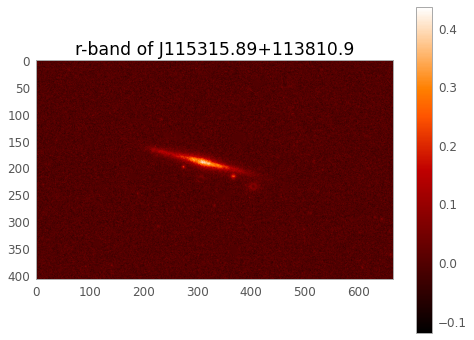

In [21]:
# r-band
plt.figure()
plt.title("r-band of J115315.89+113810.9")
plt.imshow(new_img_file[2].data)
plt.colorbar()
plt.grid(False)
plt.show()

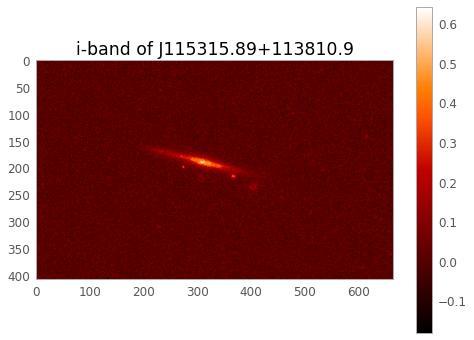

In [22]:
# i-band
plt.figure()
plt.title("i-band of J115315.89+113810.9")
plt.imshow(new_img_file[3].data)
plt.colorbar()
plt.grid(False)
plt.show()

**3) Rotate with `SERSIC_PHI` & transpose**

In [23]:
rotated_r = np.transpose(rotate(new_img_file[2].data, 104.44165))
rotated_i = np.transpose(rotate(new_img_file[3].data, 104.44165))

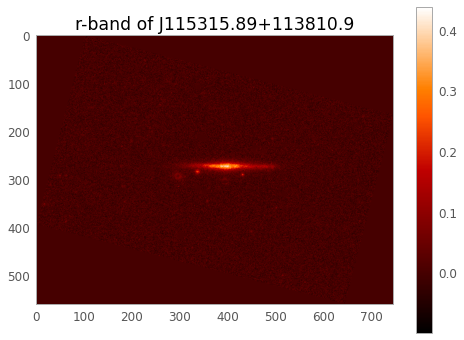

In [24]:
# r-band
plt.figure()
plt.title("r-band of J115315.89+113810.9")
plt.imshow(rotated_r)
plt.colorbar()
plt.grid(False)
plt.show()

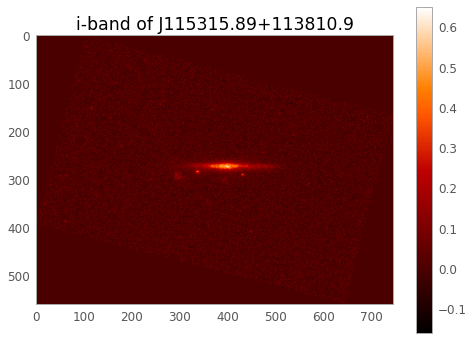

In [25]:
# i-band
plt.figure()
plt.title("i-band of J115315.89+113810.9")
plt.imshow(rotated_i)
plt.colorbar()
plt.grid(False)
plt.show()

**4) Find center & half-light radius & $L_z$**

In [26]:
# Find Center of r-band
(r_cy, r_cx) = np.unravel_index(rotated_r.argmax(), rotated_r.shape)

In [102]:
(r_cx, r_cy)

(398, 273)

In [67]:
# Convert `SERSIC_TH50` to pixel
R_eff = int(round(sample_data["SERSIC_TH50"] / 0.396))

In [68]:
L_z = int(round(3 * R_eff * 0.15))

In [69]:
R_eff

56

In [70]:
L_z

25

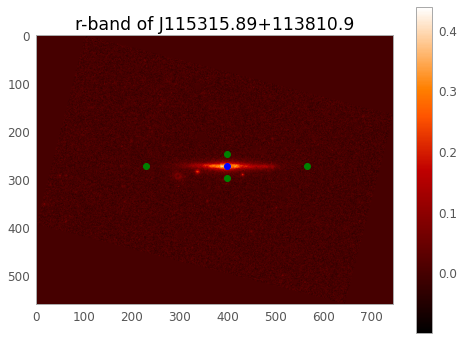

In [71]:
# r-band
plt.figure()
plt.title("r-band of J115315.89+113810.9")
plt.imshow(rotated_r)
plt.plot(r_cx, r_cy, 'bo')
plt.plot(r_cx - 3 * R_eff, r_cy, 'go') # -3R_eff
plt.plot(r_cx + 3 * R_eff, r_cy, 'go') # +3R_eff
plt.plot(r_cx, r_cy + L_z, 'go') # +L_z
plt.plot(r_cx, r_cy - L_z, 'go') # -L_z
plt.colorbar()
plt.grid(False)
plt.show()

In [72]:
# Find Center of i-band
(i_cy, i_cx) = np.unravel_index(rotated_i.argmax(), rotated_i.shape)

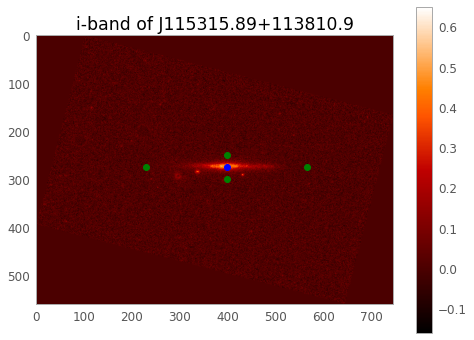

In [73]:
# i-band
plt.figure()
plt.title("i-band of J115315.89+113810.9")
plt.imshow(rotated_i)
plt.plot(i_cx, i_cy, 'bo')
plt.plot(i_cx - 3 * R_eff, i_cy, 'go') # Half-light radius
plt.plot(i_cx + 3 * R_eff, i_cy, 'go') # Half-light radius
plt.plot(i_cx, i_cy + L_z, 'go') # +L_z
plt.plot(i_cx, i_cy - L_z, 'go') # -L_z
plt.colorbar()
plt.grid(False)
plt.show()

### Crop

In [128]:
crop_r = rotated_r[r_cy - L_z : r_cy + L_z, r_cx - 3 * R_eff : r_cx + 3 * R_eff]

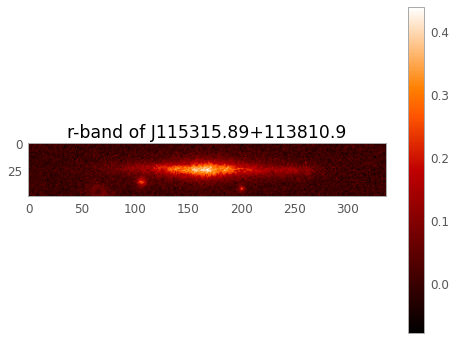

In [130]:
# r-band
plt.figure()
plt.title("r-band of J115315.89+113810.9")
plt.imshow(crop_r)
plt.colorbar()
plt.grid(False)
plt.show()

## Calculate $w_1$

**Q. Can it be possible without any procedure to remove noise?**

**A. Nope.**

**Q. Then how to?**

In [110]:
def zbar(image, x, cz):
    z_low = cz - L_z
    z_high = cz + L_z
    s1 = 0
    s2 = 0
    for z in range(z_low, z_high+1):
        s1 += (z - cz) * image[z][x]
        s2 += image[z][x]
    return s1 / s2

In [111]:
def z_mean(image, cx, cz):
    x_low = cx - 3 * R_eff
    x_high = cx +  3 * R_eff
    s = 0
    for x in range(x_low, x_high+1):
        s += zbar(image, x, cz)
    return s / (6 * R_eff)

In [112]:
def z_mean(image, cx, cz):
    x_low = cx - 3 * R_eff
    x_high = cx +  3 * R_eff
    s = 0
    for x in range(x_low, x_high+1):
        s += zbar(image, x, cz)
    return s / (6 * R_eff)

def z_prime(image, x, cz, zm):
    return zbar(image, x, cz) - zm

def w1(image, cx, cz):
    x_low = cx - 3 * R_eff
    x_high = cx + 3 * R_eff
    s = 0
    zm = z_mean(image, cx, cz)
    for x in range(x_low, x_high+1):
        s += abs(x-cx) * z_prime(image, x, cz, zm)
    return s / (3 * R_eff)**3

In [113]:
z_mean(rotated_r, r_cx, r_cy)

-3.1425604771015863

In [114]:
def w1(image, cx, cz):
    x_low = cx - 3 * R_eff
    x_high = cx + 3 * R_eff
    s = 0
    zm = z_mean(image, cx, cz)
    for x in range(x_low, x_high+1):
        s += abs(x-cx) * z_prime(image, x, cz, zm)
    return s / (3 * R_eff)**3

In [115]:
w1(rotated_r, r_cx, r_cy)

-0.018914869089639012

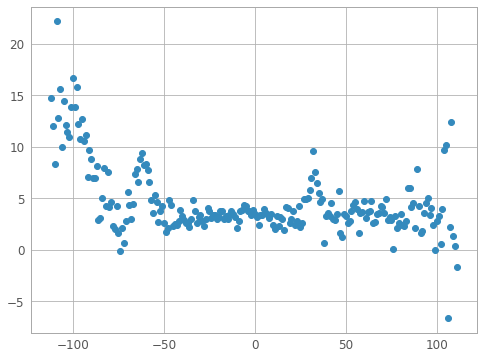

In [119]:
plt.figure()
x = np.arange(r_cx - 2 * R_eff, r_cx + 2 * R_eff, 1)
zm = z_mean(rotated_r, r_cx, r_cy)
z = [z_prime(rotated_r, t, r_cy, zm) for t in x]
plt.scatter(x-r_cx,z)
plt.show()

## Image processing for various fits files

In [88]:
img_sersic = fits.open("images/J115315.89+113810.9-145-sersic.fits")
img_sersic.info()

Filename: images/J115315.89+113810.9-145-sersic.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   (665, 408)   float32   


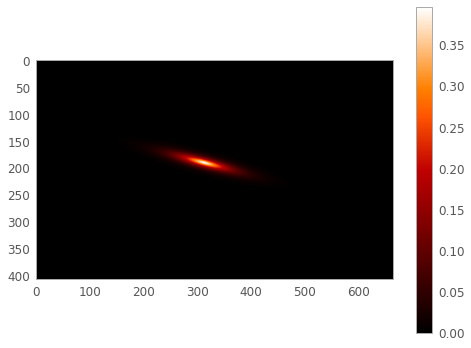

In [93]:
plt.figure()
plt.imshow(img_sersic[0].data)
plt.colorbar()
plt.grid(False)
plt.show()

In [98]:
rotated_sersic = np.transpose(rotate(img_sersic[0].data, 104.44165))

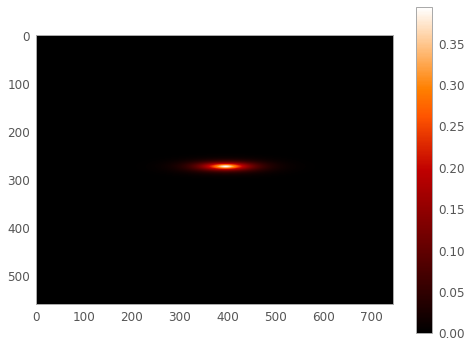

In [99]:
plt.figure()
plt.imshow(rotated_sersic)
plt.colorbar()
plt.grid(False)
plt.show()

In [101]:
# Find Center of r-band
(s_cy, s_cx) = np.unravel_index(rotated_sersic.argmax(), rotated_sersic.shape)
(s_cx, s_cy)

(395, 274)

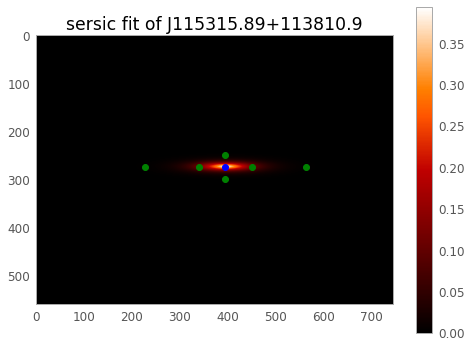

In [104]:
# r-band
plt.figure()
plt.title("sersic fit of J115315.89+113810.9")
plt.imshow(rotated_sersic)
plt.plot(s_cx, s_cy, 'bo')
plt.plot(s_cx - R_eff, s_cy, 'go') # -3R_eff
plt.plot(s_cx + R_eff, s_cy, 'go') # +3R_eff
plt.plot(s_cx - 3 * R_eff, s_cy, 'go') # -3R_eff
plt.plot(s_cx + 3 * R_eff, s_cy, 'go') # +3R_eff
plt.plot(s_cx, s_cy + L_z, 'go') # +L_z
plt.plot(s_cx, s_cy - L_z, 'go') # -L_z
plt.colorbar()
plt.grid(False)
plt.show()

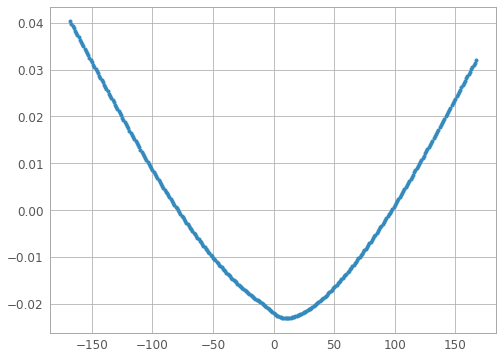

In [121]:
plt.figure()
x = np.arange(s_cx - 3 * R_eff, s_cx + 3 * R_eff, 1)
zm = z_mean(rotated_sersic, s_cx, s_cy)
z = [z_prime(rotated_sersic, t, s_cy, zm) for t in x]
plt.scatter(x - s_cx,z, marker='.')
plt.show()

## OOP

In [286]:
class Galaxy:
    def __init__(self, catalog):
        self.name = str(catalog["IAUNAME"].values[0])
        self.scale = 2
        self.R_eff = int(round(catalog["SERSIC_TH50"] / 0.396))
        self.L_z = int(round(R_eff * catalog["SERSIC_BA"] * self.scale))
        self.phi = float(catalog["SERSIC_PHI"])
        self.pid = int(catalog["PID"])
        self.aid = int(catalog["AID"])
        self.dir = f"images/{self.name}-{self.pid}-atlas-{self.aid}.fits"
        self.hdu = fits.open(self.dir)
        self.r_band = self.hdu[2].data
        self.r_band_rot = np.transpose(rotate(self.r_band, self.phi))
        self.find_center()
        self.r_band_crop = self.r_band_rot[self.cz-self.L_z:self.cz+self.L_z, self.cx-self.scale*self.R_eff:self.cx+self.scale*self.R_eff]
        self.zm = self.z_mean()
                
    def find_center(self):
        (z, x) = np.unravel_index(self.r_band_rot.argmax(), self.r_band_rot.shape)
        self.cx = x
        self.cz = z
        
    def imshow(self, im):
        plt.figure(figsize=(10,6), dpi=120)
        if im == "original":
            plt.title(f"r-band of {self.name} ({im})")
            plt.imshow(self.r_band)
            plt.colorbar()
        elif im == "rotated":
            plt.title(f"r-band of {self.name} ({im})")
            plt.imshow(self.r_band_rot)
            plt.colorbar()
        elif im == "cropped":
            plt.title(f"r-band of {self.name} ({im})")
            plt.imshow(self.r_band_crop)
            plt.colorbar()
        elif im == "z_prime":
            x_temp = np.arange(self.cx - self.scale*self.R_eff, self.cx + self.scale*self.R_eff, 1)
            x = []
            z = []
            for t in x_temp:
                zp = self.z_prime(t)
                if abs(zp) < 100:
                    x.append(t)
                    z.append(zp)
            x = np.array(x)
            z = np.array(z)
            plt.title(f"z_prime of {self.name}")
            plt.scatter(x-self.cx, z, marker='.')
        plt.grid(False)
        plt.show()
        
    def z_bar(self, x):
        z_low = self.cz - self.L_z
        z_high = self.cz + self.L_z
        s1 = 0
        s2 = 0
        for z in range(z_low, z_high + 1):
            s1 += (z - self.cz) * self.r_band_rot[z][x]
            s2 += self.r_band_rot[z][x]
        return s1 / s2
    
    def z_mean(self):
        x_low = self.cx - self.scale * self.R_eff
        x_high = self.cx +  self.scale * self.R_eff
        s = 0
        for x in range(x_low, x_high+1):
            s += self.z_bar(x)
        return s / (self.scale * 2 * self.R_eff)
    
    def z_prime(self, x):
        return self.z_bar(x) - self.zm
    
    def w1(self):
        x_low = self.cx - self.scale * self.R_eff
        x_high = self.cx + self.scale * self.R_eff
        s = 0
        for x in range(x_low, x_high+1):
            zp = self.z_prime(x)
            if abs(zp) < 100:
                s += abs(x-self.cx) * self.z_prime(x)
        return s / (self.scale * self.R_eff)**3

In [287]:
def find_catalog(iauname):
    return nsa_filter1[nsa_filter1["IAUNAME"] == iauname]

In [288]:
cat_paper = nsa_filter1[nsa_filter1["IAUNAME"] == "J115012.10+065956.9"]
cat_paper

,IAUNAME,PID,AID,RA,DEC,ZDIST,MAG,SERSIC_N,SERSIC_BA,SERSIC_TH50,SERSIC_PHI,IALFALFA
589353,J115012.10+065956.9,79,1,177.551451,6.99846,0.019901,15.5,0.739876,0.15,24.919725,104.549316,-1


In [289]:
gal_paper = Galaxy(cat_paper)

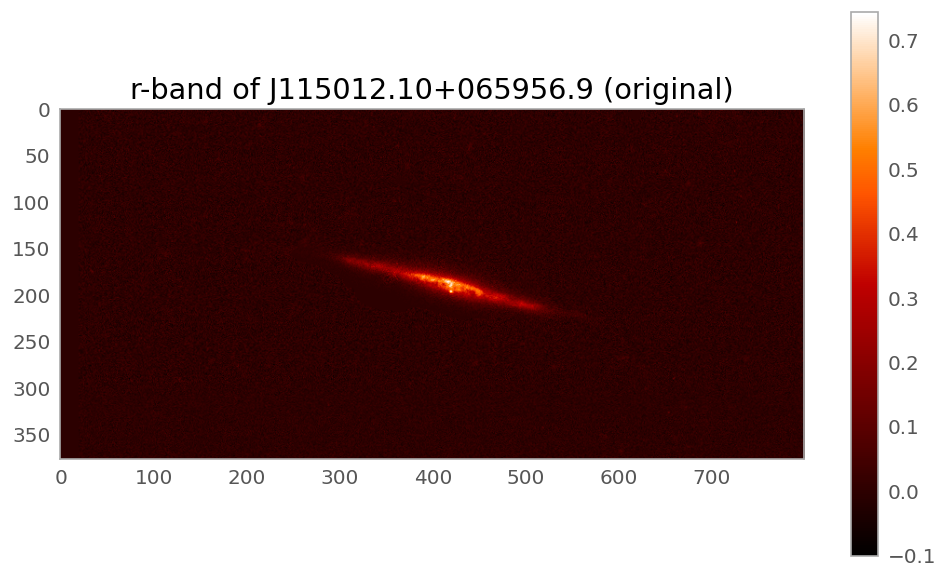

In [290]:
gal_paper.imshow("original")

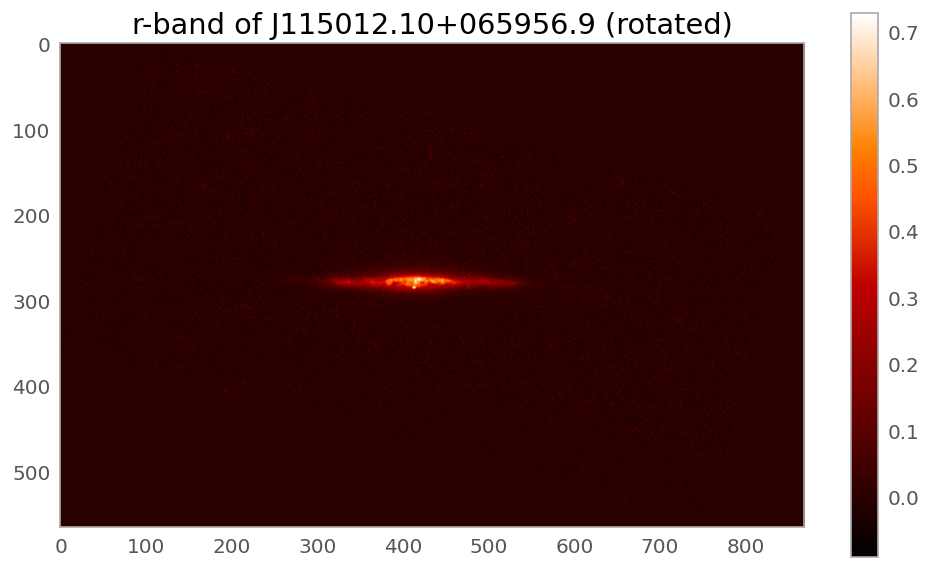

In [291]:
gal_paper.imshow("rotated")

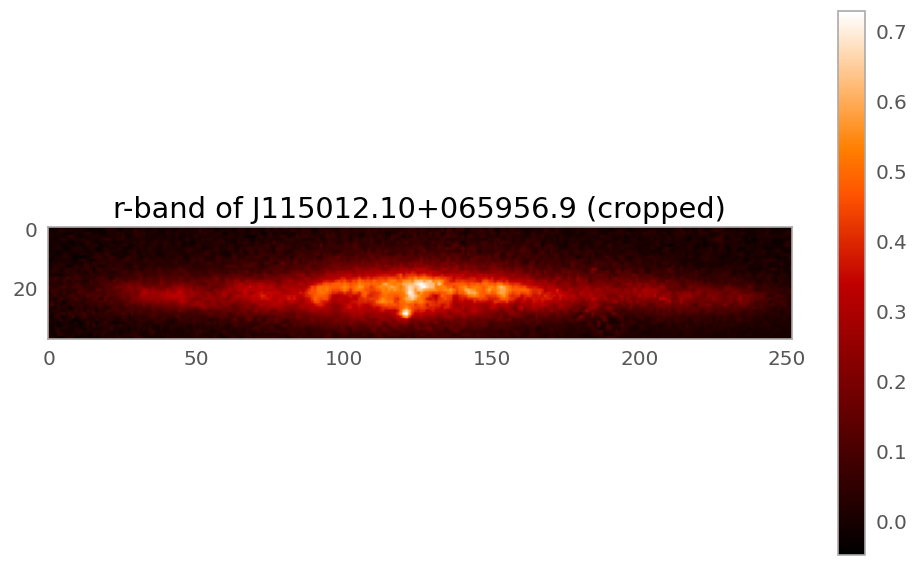

In [292]:
gal_paper.imshow("cropped")

In [293]:
gal_paper.w1()

0.0021950858571318775

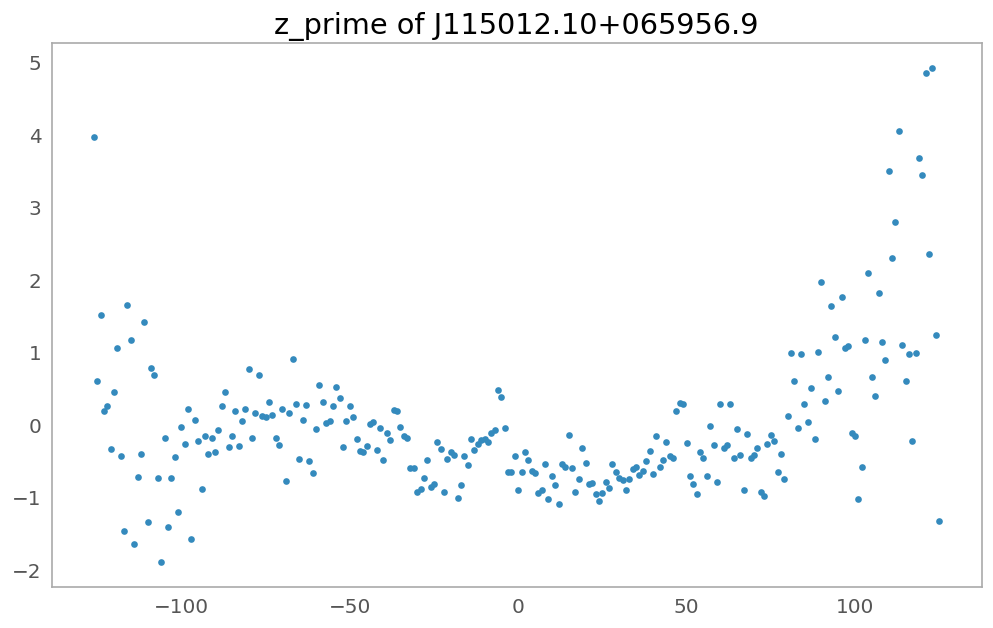

In [294]:
gal_paper.imshow("z_prime")

## Noise Reduction

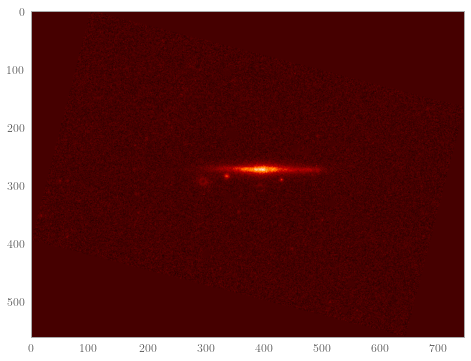

In [358]:
plt.imshow(rotated_r)
plt.grid(False)

In [301]:
image = rotated_r

### Mean Filter

In [370]:
kernel_size = 7
new_image = cv2.blur(image, (kernel_size, kernel_size))

In [371]:
new_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [372]:
new_image.max()

0.3624639

In [373]:
new_image.min()

-0.016507968

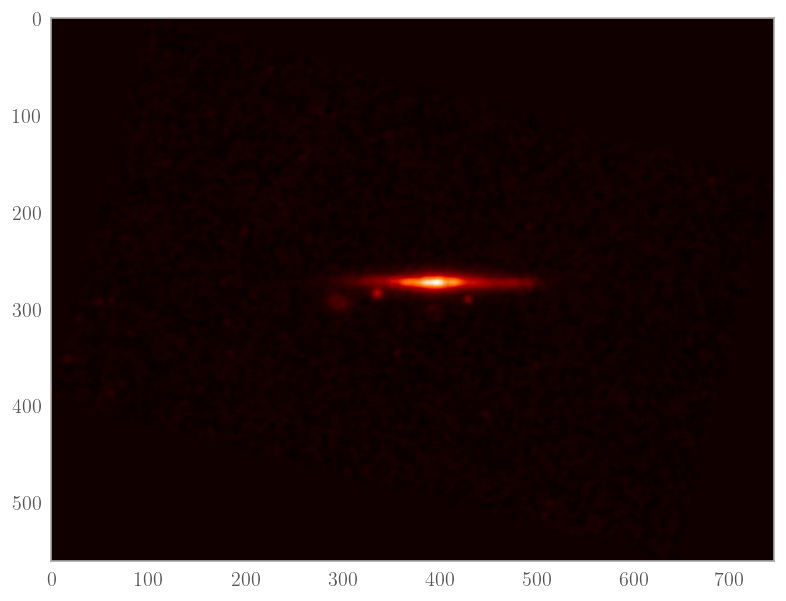

In [374]:
plt.figure(figsize=(10,6), dpi=120)
plt.imshow(new_image)
plt.grid(False)
plt.show()

### Gaussian Filter

In [419]:
kernel_size = 5
new_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

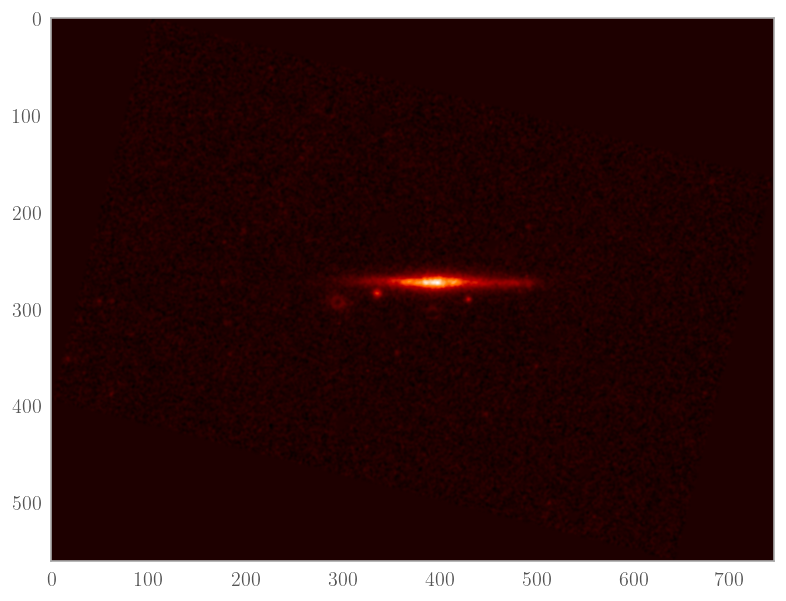

In [420]:
plt.figure(figsize=(10,6), dpi=120)
plt.imshow(new_image)
plt.grid(False)
plt.show()

In [377]:
new_crop = cv2.GaussianBlur(crop_r, (5, 5), 0)

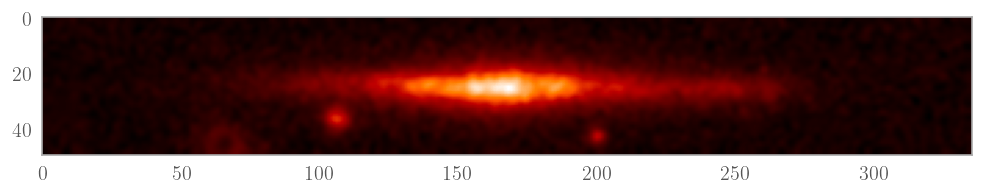

In [378]:
plt.figure(figsize=(10,6), dpi=120)
plt.imshow(new_crop)
plt.grid(False)
plt.show()

### Conservative Smoothing

In [327]:
# first a conservative filter for grayscale images will be defined.
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp =[]
    return new_image.copy()

In [340]:
new_image = conservative_smoothing_gray(crop_r, 9)

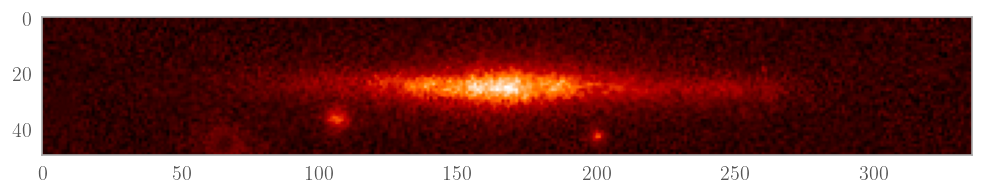

In [341]:
plt.figure(figsize=(10,6), dpi=120)
plt.imshow(new_image)
plt.grid(False)
plt.show()

## Remove small objects

In [349]:
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(crop_r, connectivity=8)

error: OpenCV(4.4.0) /tmp/pip-req-build-vu_aq9yd/opencv/modules/imgproc/src/connectedcomponents.cpp:3951: error: (-215:Assertion failed) iDepth == CV_8U || iDepth == CV_8S in function 'connectedComponents_sub1'


In [350]:
crop_r

array([[ 9.91378911e-03,  1.52418045e-02,  2.12717950e-02, ...,
         1.18707102e-02, -1.14562735e-02,  8.75109900e-03],
       [-3.32690850e-02,  1.50681799e-03, -6.57729292e-03, ...,
         3.34299132e-02,  9.10933036e-03, -1.87658193e-03],
       [-5.26897795e-02,  5.19283488e-03,  1.96806770e-02, ...,
         3.20553267e-03,  9.82229598e-03, -1.00531243e-02],
       ...,
       [-1.01193124e-02, -8.09893070e-04,  3.88512015e-02, ...,
        -3.34054008e-02,  9.33338422e-03,  2.99892034e-02],
       [-1.57921966e-02, -1.47066042e-02,  2.05616895e-02, ...,
        -1.61217675e-02,  1.47233848e-02,  1.64740719e-02],
       [ 2.84999958e-03, -2.70103570e-02, -2.41089109e-02, ...,
        -6.27916353e-03,  1.04439659e-02,  3.42679305e-05]], dtype=float32)

In [354]:
crop_r.shape

(50, 336)

In [356]:
crop_r.max()

0.43876165

In [357]:
crop_r.min()

-0.078203276

In [380]:
mask_gray = cv2.normalize(src=crop_r, dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

In [381]:
mask_gray

array([[43.464943, 46.09306 , 49.067436, ..., 44.43022 , 32.92387 ,
        42.891434],
       [22.164402, 39.318092, 35.330494, ..., 55.064594, 43.068134,
        37.649185],
       [12.584881, 41.13627 , 48.282597, ..., 40.156006, 43.419815,
        33.615993],
       ...,
       [33.583344, 38.175343, 57.73872 , ..., 22.097164, 43.178654,
        53.367416],
       [30.785116, 31.3206  , 48.717167, ..., 30.622551, 45.837345,
        46.700893],
       [39.980633, 25.251606, 26.682783, ..., 35.47755 , 43.726463,
        38.591736]], dtype=float32)

In [383]:
mask_gray.max()

255.0

In [384]:
mask_gray.min()

3.291957e-07

In [415]:
ret, mask = cv2.threshold(mask_gray, 50, 255, cv2.THRESH_BINARY)

In [416]:
mask_inv = cv2.bitwise_not(mask)

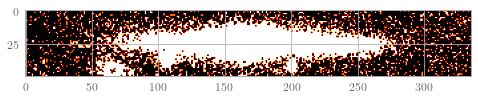

In [417]:
plt.imshow(mask)

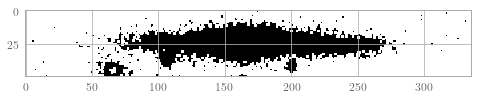

In [418]:
plt.imshow(mask_inv)

In [414]:
img_fg = cv2.bitwise_and(mask_gray, mask_gray, mask=mask)

error: OpenCV(4.4.0) /tmp/pip-req-build-vu_aq9yd/opencv/modules/core/src/arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
